<Body>   
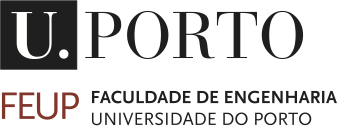   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Mar. 2024

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** both the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.

**Deadlines:** Present the state of your work (and answer questions) on the week of **March 18** in your corresponding practical class. Upload the files until 23:59 of **March 27, 2024**.


---



In [90]:
# To make a nice pdf file of this file, you have to do the following:
# - upload this file into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "ML_project1.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] Converting notebook ML_project1.ipynb to html
[NbConvertApp] Writing 1124406 bytes to ML_project1.html


# **Identification**

* **Group:** Project_A02_B
* **Name:** Diogo Araújo de Oliveira
* **Student Number:** 202007968

* **Name:** Tiago Marques Claro
* **Student Number:** 202006003


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [91]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d.


^C


In [1]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
#df.head()
df

# By convention, values that are zero signify no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,0.0,-3.946339,-2.912177,0.711051,-0.307325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.000000,0.000000,0.678366,-0.308563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.000000,0.000000,0.677682,-0.285029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.000000,0.000000,0.648523,-0.293170,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.000000,0.000000,0.644965,-0.277222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,49.5,3.855108,-3.928327,-0.078142,-0.093745,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,49.6,0.000000,0.000000,-0.088140,-0.103430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,49.7,0.000000,0.000000,-0.078002,-0.092986,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,49.8,0.000000,0.000000,-0.076514,-0.091199,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!

### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*

\begin{align*}

\begin{bmatrix}

x_{t+1} \\
b_{x,t+1}
\end{bmatrix}

&= 

\begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+
\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t} &=

\begin{bmatrix}
1 & 0
\end{bmatrix}

\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}

*y-direction*

\begin{align*}

\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= 
\begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}

\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+

\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t} &=

\begin{bmatrix}
1 & 0
\end{bmatrix}

\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1**
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [2]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values



" #Plot me bx0\nax4.plot(t, bx0, 'b-', label = 'Estimation Bias')\nax4.plot(t, by0, 'r-', label = 'Measurement Bias')\nax4.set_title('aaaaaaaaa')\nax4.legend()\nplt.show() "

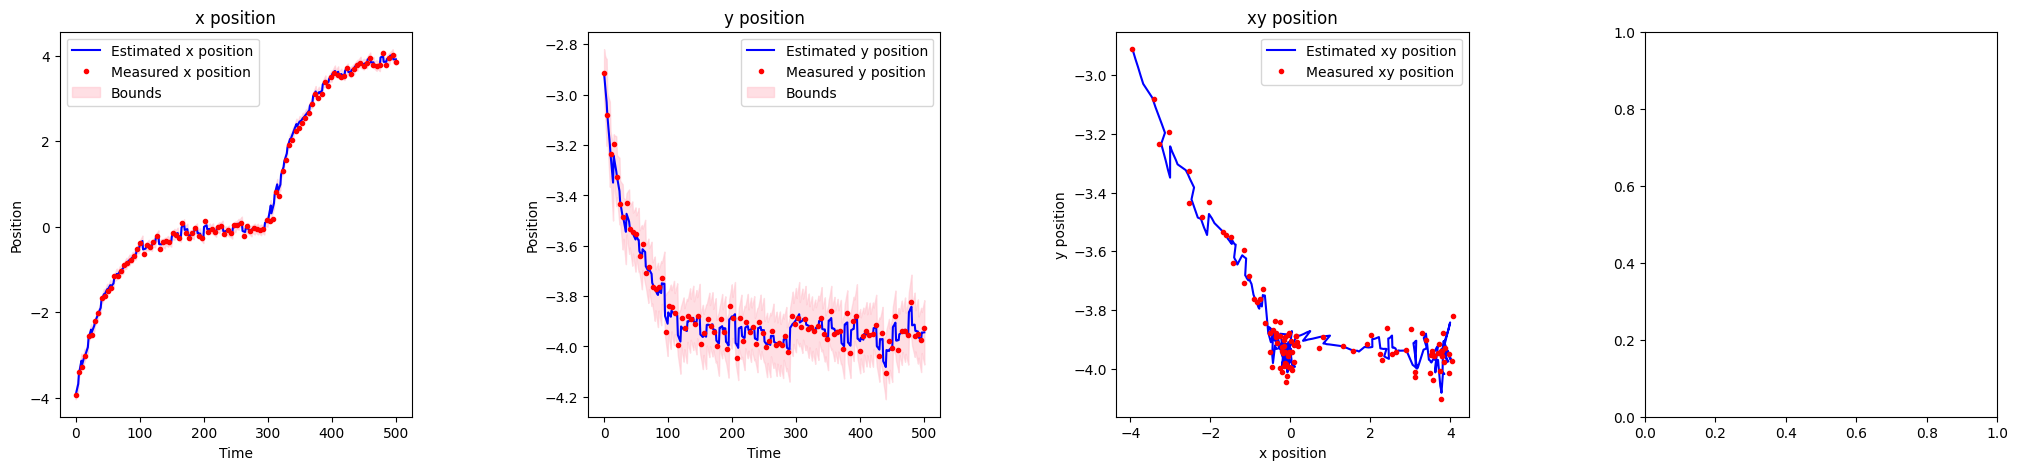

In [12]:
# To complete

#
# Kalman Filter loop
#

# TODO: plot the bias
# TODO: fix the bug
 
def kf_predict(X, P, A, Q, B, U):

	#U = np.atleast_1d(U)
	X = A @ X + B * U
	P = A @ P @ A.T + Q
	return(X,P)

def kf_update(X_in, P, Y, H, R):

	ek = Y- H @ X_in
	S = H @ P @ H.T + R
	K = P @ H.T @ np.linalg.inv(S)
	X = X_in + K @ ek
	P = P - K @ S @ K.T

	""" IS = H @ P @ H.T + R
	K = P @ H.T @ np.linalg.inv(IS)
	X = X_in + K @ (Y - H @ X_in)
	P = (np.eye(P.shape[0]) - K @ H) @ P """
	return (X,P)

N_iter = len(time)    # implies dt*N_iter seconds

# sample time
h = 0.1

# Matrixes for Kalman Filter
A = np.array([[1, h],
			  [0, 1]])

B = np.array([[h],
			  [0]])

H = np.array([[1, 0]])

# Initial Bias
bx0 = 0
by0 = 0

# Initial State
x0 = x[0]
y0 = y[0]

# Initial State Vector
X = np.array([[x0],
			  [bx0]])

Y = np.array([[y0],
			  [by0]])

# Initial Covariance Matrix
Px = np.array([[0.1, 0],
			   [0, 0.1]])

Py = Px.copy()

# Process Noise Covariance Matrix
Qx = np.array([[0.001, 0],
			  [0, 0.001]])

Qy = Qx.copy()

# Measurement Noise Covariance Matrix
Rx = np.array([[0.01]])
Ry = Rx.copy()

# Estimation Variables
x_est = np.zeros((len(time), 1))
y_est = x_est.copy()
bx_est = x_est.copy()
by_est = x_est.copy()
vx_est = x_est.copy()
vy_est = x_est.copy()

# Measurement Variables
x_meas = []
y_meas = []

# Bound Variables
x_upperBound = np.zeros((len(time), 1))
x_lowerBound = x_upperBound.copy()
y_upperBound = x_upperBound.copy()
y_lowerBound = x_upperBound.copy()

for t in arange(0, N_iter):

	# Retrieve the velocity measurements at time t
	Ux = np.array([vx[t]])
	Uy = np.array([vy[t]])

	# Estimate the next state based on the previous state and the process model
	(X, Px) = kf_predict(X, Px, A, Qx, B, Ux)
	(Y, Py) = kf_predict(Y, Py, A, Qy, B, Uy)

	# Store the estimated state
	x_est[t] = X[0][0]
	bx_est[t] = X[1][0]
	y_est[t] = Y[0][0]
	by_est[t] = Y[1][0]

	# Store the estimated velocity
	vx_est[t] = vx[t] + bx_est[t]
	vy_est[t] = vy[t] + by_est[t]

	# Store the bounds
	x_upperBound[t] = x_est[t] + sqrt(Px[0][0])
	x_lowerBound[t] = x_est[t] - sqrt(Px[0][0])
	y_upperBound[t] = y_est[t] + sqrt(Py[0][0])
	y_lowerBound[t] = y_est[t] - sqrt(Py[0][0])


	if t%5 == 0:

		# Retrive the measurements at time t
		Zx = np.array([[x[t]]])
		Zy = np.array([[y[t]]])

		# Update the state based on the measurement
		(X, Px) = kf_update(X, Px, Zx, H, Rx)
		(Y, Py) = kf_update(Y, Py, Zy, H, Ry)

		# Store the measurements
		x_est[t] = X[0][0]
		bx_est[t] = X[1][0]
		y_est[t] = Y[0][0]
		by_est[t] = Y[1][0]

		# Store the estimated velocity
		vx_est[t] = vx[t] + bx_est[t]
		vy_est[t] = vy[t] + by_est[t]

		# Store the bounds
		x_upperBound[t] = x_est[t] + sqrt(Px[0][0])
		x_lowerBound[t] = x_est[t] - sqrt(Px[0][0])
		y_upperBound[t] = y_est[t] + sqrt(Py[0][0])
		y_lowerBound[t] = y_est[t] - sqrt(Py[0][0])
		
		# Store the measurements
		x_meas.append(x[t])
		y_meas.append(y[t])

# Plot the results

t = np.linspace(0, N_iter, N_iter)
t_meas = np.linspace(0, N_iter, len(x_meas))

fig = plt.figure(figsize=(25, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

# Plot the x position
ax1.plot(t, x_est, 'b-', label = 'Estimated x position')
ax1.plot(t_meas, x_meas, 'r.', label = 'Measured x position')
ax1.fill_between(t, x_upperBound[:,0], x_lowerBound[:,0], color = 'pink', alpha = 0.5, label = 'Bounds')
ax1.set_title('x position')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.legend()

# Plot the y position
ax2.plot(t, y_est, 'b-', label = 'Estimated y position')
ax2.plot(t_meas, y_meas, 'r.', label = 'Measured y position')
ax2.fill_between(t, y_upperBound[:,0], y_lowerBound[:,0], color = 'pink', alpha = 0.5, label = 'Bounds')
ax2.set_title('y position')
ax2.set_xlabel('Time')
ax2.set_ylabel('Position')
ax2.legend()

# Plot the xy position
ax3.plot(x_est, y_est, 'b-', label = 'Estimated xy position')
ax3.plot(x_meas, y_meas, 'r.', label = 'Measured xy position')
ax3.set_title('xy position')
ax3.set_xlabel('x position')
ax3.set_ylabel('y position')
ax3.legend()

""" #Plot me bx0
ax4.plot(t, bx0, 'b-', label = 'Estimation Bias')
ax4.plot(t, by0, 'r-', label = 'Measurement Bias')
ax4.set_title('aaaaaaaaa')
ax4.legend()
plt.show() """

# End For Loop



# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is,
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

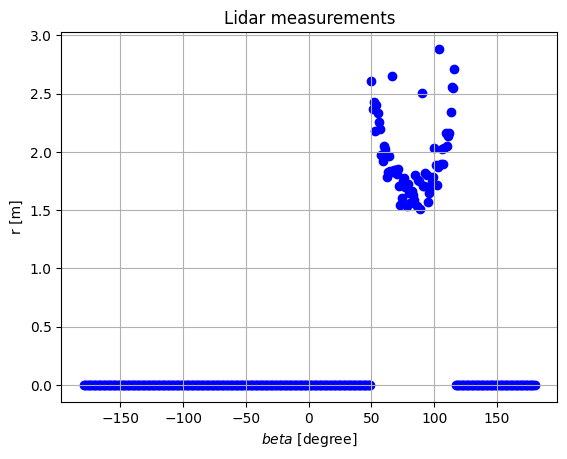

In [13]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid()



**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data,
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x }
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



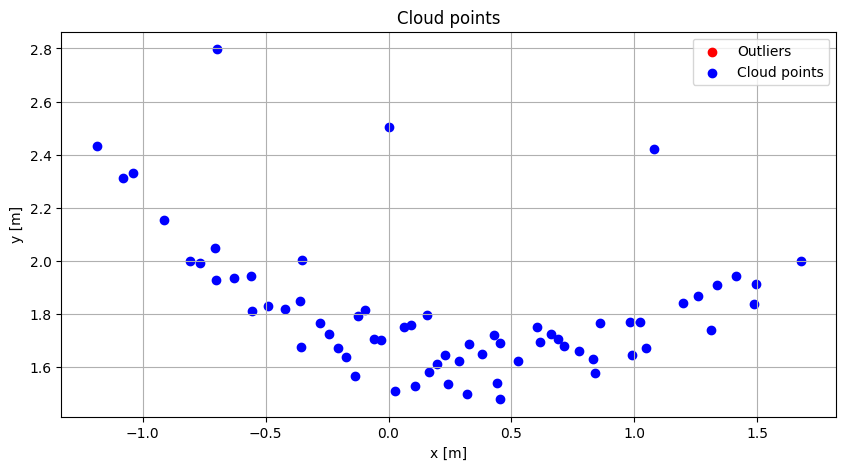

In [14]:
# Part 2.1.1

#To complete

def deg2rad(angle):
	return angle*pi/180

#Build the cloud points in 2D plan
x_o, y_o = [], []
x_outlier, y_outlier = [], []

t=5*10 # t = 5 sec * 1/sample_time

for i in range(len(Lidar_range[t])):

	# Get all the point cloud
	if Lidar_range[t][i] > 0:
    	
		angle = i - 179
		Position_X = Lidar_range[t][i]*cos(deg2rad(angle))
		Position_Y = Lidar_range[t][i]*sin(deg2rad(angle))
		x_o.append(Position_X)
		y_o.append(Position_Y)

		""" # Break the loop if the angle is 0 or 360
		if i==0 or i == 360:
			continue

		#Outliers
		if (Lidar_range[t][i-1] != 0 and Lidar_range[t][i+1] != 0 and Lidar_range[t][i] == 0):

			print('Outlier detected') """

# Plot the results

figure = plt.figure(figsize=(10, 5))
plt.scatter(x_outlier, y_outlier, color='r', label='Outliers')
plt.scatter(x_o, y_o, color='b', label='Cloud points')
plt.title('Cloud points')
plt.ylabel('y [m]')
plt.xlabel('x [m]')
plt.legend()
plt.grid()
plt.show()


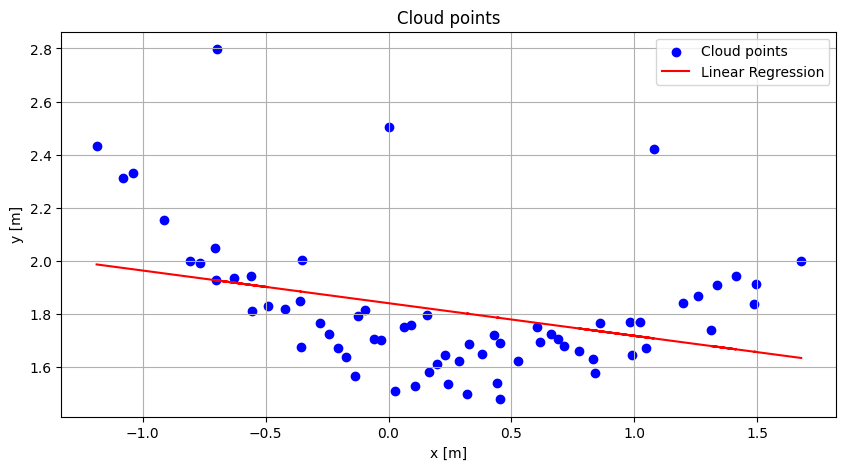

In [15]:
# Part 2.1.2

# Create X matrix with bias
X_o = np.reshape(x_o,(len(x_o),1))
ones = np.ones((len(x_o), 1))

# Create Y matrix
X = np.concatenate((ones, X_o), axis = 1)
Y = np.reshape(y_o,(len(y_o),1))

# Compute the theta
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

# Plot the results
figure = plt.figure(figsize=(10, 5))
plt.scatter(x_o, y_o, color='b', label='Cloud points')
plt.plot(X_o, X @ theta, color='r', label='Linear Regression')
plt.title('Cloud points')
plt.ylabel('y [m]')
plt.xlabel('x [m]')
plt.legend()
plt.grid()
plt.show()


**2.2**
Repeat the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x + \theta_2 x^2 }
 \end{equation}



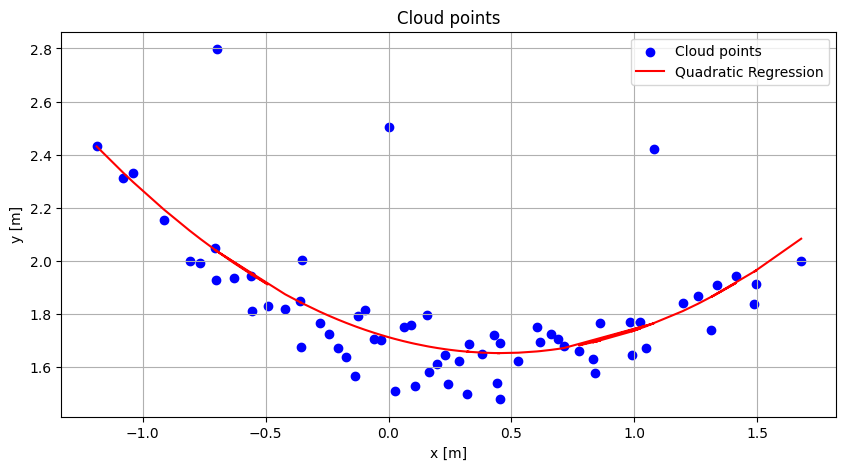

In [16]:
# To complete

# Create the matrix X with bias
X = np.concatenate((X, X_o**2), axis=1)

# Compute the theta
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

# Plot the results
figure = plt.figure(figsize=(10, 5))
plt.scatter(x_o, y_o, color='b', label='Cloud points')
plt.plot(X_o, X @ theta, color='r', label='Quadratic Regression')
plt.title('Cloud points')
plt.ylabel('y [m]')
plt.xlabel('x [m]')
plt.legend()
plt.grid()
plt.show()

**2.3**
At this point you can use sklearn!
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




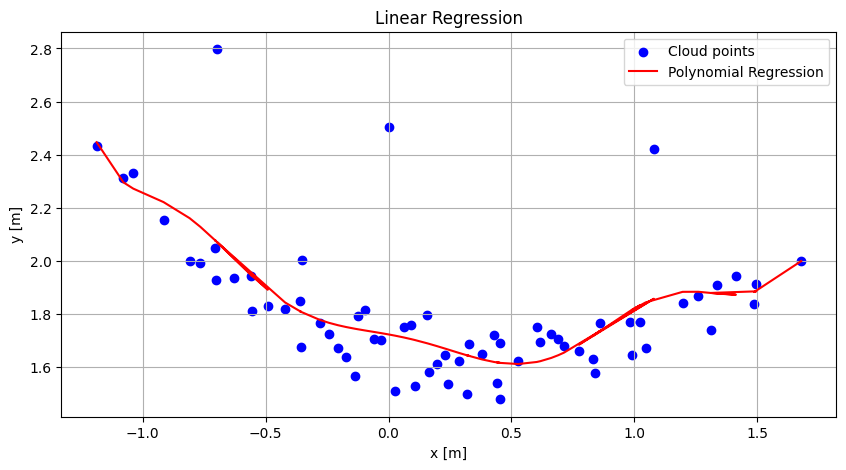

[[ 0.         -0.16798074 -0.21301798 -0.74450385  1.83884016  1.21760818
  -2.10877866 -0.54231994  0.89427046  0.02001598 -0.09624344]]


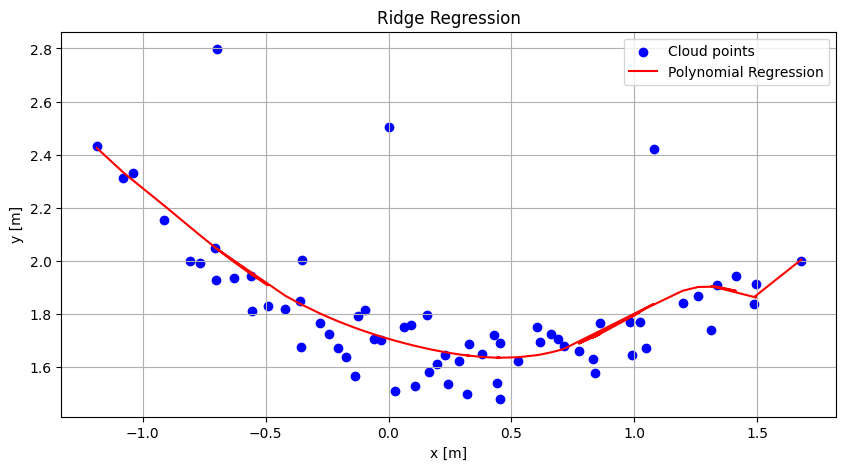

[[ 0.         -0.27129512  0.2279277  -0.04805922  0.19218075  0.08568745
  -0.03308876  0.03321168 -0.10179623 -0.03856485  0.04314287]]


c:\Users\tmcla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.203e-04, tolerance: 4.299e-04
  model = cd_fast.enet_coordinate_descent(


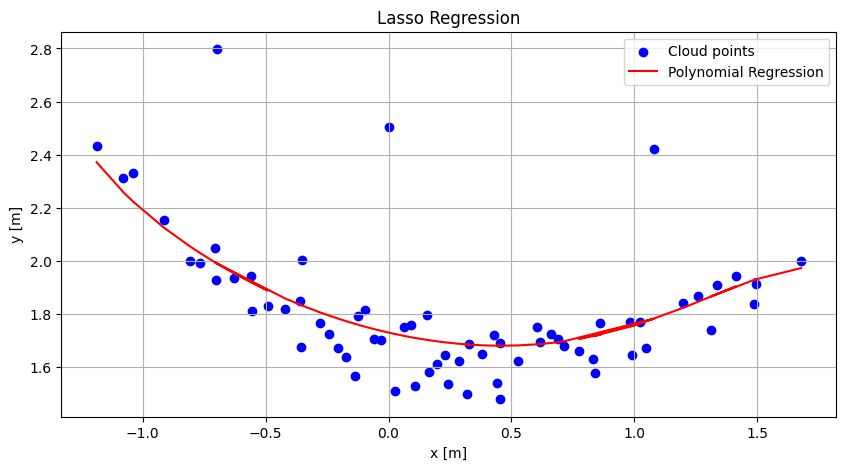

[ 0.         -0.21113514  0.22064891 -0.          0.02145712 -0.
  0.         -0.          0.         -0.00543968  0.00214423]


In [17]:
from sklearn.linear_model import LinearRegression

# Create the matrix X with bias degree 10
for i in range(3, 11):
	X = np.concatenate((X, X_o**i), axis=1)

# normalize the data



##################################################
################ LinearRegression ################
##################################################

# Create the model
model_linear = LinearRegression(fit_intercept=True)

# Fit the model
model_linear.fit(X, Y)

# Plot the results
figure = plt.figure(figsize=(10, 5))
plt.scatter(x_o, y_o, color='b', label='Cloud points')
plt.plot(X_o, model_linear.predict(X), color='r', label='Polynomial Regression')
plt.title('Linear Regression')
plt.ylabel('y [m]')
plt.xlabel('x [m]')
plt.legend()
plt.grid()
plt.show()

print(model_linear.coef_)

##################################################
################ Ridge Regression ################
##################################################

from sklearn.linear_model import Ridge

# Create the model
model_ridge = Ridge(alpha=0.1, fit_intercept=True)

# Fit the model
model_ridge.fit(X, Y)

# Plot the results
figure1 = plt.figure(figsize=(10, 5))
plt.scatter(x_o, y_o, color='b', label='Cloud points')
plt.plot(X_o, model_ridge.predict(X), color='r', label='Polynomial Regression')
plt.title('Ridge Regression')
plt.ylabel('y [m]')
plt.xlabel('x [m]')
plt.legend()
plt.grid()
plt.show()

print(model_ridge.coef_)

##################################################
################ Lasso Regression ################
##################################################

from sklearn.linear_model import Lasso

# Create the model
model_lasso = Lasso(alpha=0.01, fit_intercept=True)

# Fit the model
model_lasso.fit(X, Y)

# Plot the results
figure1 = plt.figure(figsize=(10, 5))
plt.scatter(x_o, y_o, color='b', label='Cloud points')
plt.plot(X_o, model_lasso.predict(X), color='r', label='Polynomial Regression')
plt.title('Lasso Regression')
plt.ylabel('y [m]')
plt.xlabel('x [m]')
plt.legend()
plt.grid()
plt.show()

print(model_lasso.coef_)


**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for
$\color{green} \theta$.


In [ ]:
# To complete


**2.5 (Extra)**
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
# To complete
